## 1. Data Understanding 

This dataset includes a binary classification dataset where each row represents a large number of audio-visual features calculated for a running program. 

The column 'target' has values -1 and 1 respectively denoting non-commercial and commercial program.

In feature File, there are numbered columns. Below here is the description for different columns as provided by the source.

Shot Length
1

Motion Distribution( Mean and Variance)
2 - 3

Frame Difference Distribution ( Mean and Variance)
4 - 5

Short time energy ( Mean and Variance)
6 - 7

ZCR( Mean and Variance)
8 - 9

Spectral Centroid ( Mean and Variance)
10 - 11

Spectral Roll off ( Mean and Variance)
12 - 13

Spectral Flux ( Mean and Variance)
14 - 15

Fundamental Frequency ( Mean and Variance)
16 - 17

Motion Distribution ( 40 bins)
18 - 58

Frame Difference Distribution ( 32 bins)
59 - 91

Text area distribution ( 15 bins Mean and 15 bins for variance )
92 - 122

Bag of Audio Words ( 4000 bins)
123 - 4123

Edge change Ratio ( Mean and Variance)
4124 - 4125


This is a dataset with 232 columns and all of these are very different types of audio-visual features. Useful exploration of this dataset will be to create good classifiers which can efficiently detect Tv commercials.

Link to dataset - https://www.kaggle.com/datasets/shyambhu/bbc-television-advertisementcsv

## 2. Import Libraries 

In [418]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Collection and Loading

In [419]:
#Load CSV file
df=pd.read_csv(r"C:\Users\sowda\Edubridge\BBC.csv")

## 4. Data Inspection

In [420]:
#Print Top 5 rows
df.head()

,index,target,qid,2,3,4,5,6,7,8,...,924,959,1002,1016,1028,1048,1112,1119,4124,4125
0,123,1,0,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,...,0.008475,0.036017,0.006356,0.008475,0.0,0.002119,0.000000,0.0,0.422334,0.663918
1,124,1,0,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,...,0.109244,0.117647,0.006303,0.000000,0.0,0.008403,0.000000,0.0,0.332664,0.766184
2,109,1,0,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,...,0.074519,0.062500,0.004808,0.000000,0.0,0.009615,0.000000,0.0,0.346674,0.225022
3,86,1,0,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,...,0.061728,0.046296,0.012346,0.000000,0.0,0.012346,0.003086,0.0,0.993323,0.840083
4,76,1,0,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,...,0.000000,0.000000,0.003521,0.000000,0.0,0.045775,0.007042,0.0,0.341520,0.710470


In [421]:
#Dimensions of dataset
df.shape

(17720, 232)

In [422]:
#Examine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 232 entries, index to 4125
dtypes: float64(228), int64(4)
memory usage: 31.4 MB


In [423]:
#Explore Columns
df.columns

Index(['index', 'target', 'qid', '2', '3', '4', '5', '6', '7', '8',
       ...
       '924', '959', '1002', '1016', '1028', '1048', '1112', '1119', '4124',
       '4125'],
      dtype='object', length=232)

In [424]:
#Check for Null Values
df.isnull().sum()

index     0
target    0
qid       0
2         0
3         0
         ..
1048      0
1112      0
1119      0
4124      0
4125      0
Length: 232, dtype: int64

## 5.Data Cleaning

No Null values are found

In [425]:
#Check for duplicate rows
df.duplicated().sum()

0

No duplicate rows are present

## 6. Exploratory Data Analysis

In [426]:
#Statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,17720.0,129.677314,335.345837,25.000000,34.000000,62.000000,124.000000,33871.000000
target,17720.0,-0.050113,0.998772,-1.000000,-1.000000,-1.000000,1.000000,1.000000
qid,17720.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,17720.0,2.075590,2.480090,0.000000,0.129339,1.184123,3.056430,21.679216
3,17720.0,1.197020,1.448049,0.000000,0.086560,0.745513,1.802253,28.756622
...,...,...,...,...,...,...,...,...
1048,17720.0,0.011438,0.027180,0.000000,0.000000,0.000000,0.012490,0.840909
1112,17720.0,0.000718,0.005108,0.000000,0.000000,0.000000,0.000000,0.223214
1119,17720.0,0.000112,0.002635,0.000000,0.000000,0.000000,0.000000,0.125000
4124,17720.0,0.500252,0.288963,0.000032,0.248851,0.499183,0.751989,0.999842


C:\Users\sowda\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


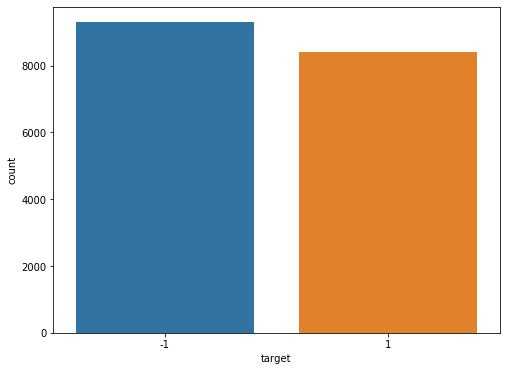

In [427]:
#Examining Target Varibale
fig = plt.figure(figsize=(8, 6))
sns.countplot(df.target)

## 7. Correlation Analysis

In [428]:
#Find correlations of features with target
correlations = df.corr()['target']
print(correlations)

index    -0.153418
target    1.000000
qid            NaN
2         0.079897
3         0.162799
            ...   
1048     -0.114388
1112     -0.008795
1119      0.026093
4124      0.005264
4125      0.001783
Name: target, Length: 232, dtype: float64


In [429]:
#drop columns with irrelevant data
df.drop(['qid','88'],axis=1,inplace=True)

In [430]:
#Print features with significant correlation with target
selected_columns = correlations[(correlations > 0.5) | (correlations < -0.5)].index
print(selected_columns)

Index(['target'], dtype='object')


None of the columns show any particular correlation with target columns hence it is ideal to use Non Parametric Algorithms that don't make strong assumptions about the underlying distribution of the data.

## 8. Outlier Detection 

In [431]:
# Define the skewness threshold
skewness_threshold = 2.0  # You can adjust this threshold based on data

# Initialize an empty list to store columns with potential outliers
columns_with_outliers = []

# Loop through each column
for column in df.columns:
    # Calculate the skewness of the column
    skewness = df[column].skew()

    # Check if skewness exceeds the threshold
    if np.abs(skewness) > skewness_threshold:
        columns_with_outliers.append(column)

# Print columns with potential outliers
print("Columns with Potential Outliers (based on skewness):")
print(columns_with_outliers)


Columns with Potential Outliers (based on skewness):
['index', '3', '5', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '62', '65', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '105', '106', '107', '108', '123', '125', '127', '128', '129', '130', '131', '134', '137', '141', '142', '143', '144', '145', '149', '152', '156', '162', '166', '168', '171', '176', '178', '182', '185', '186', '187', '188', '192', '194', '195', '197', '198', '203', '206', '208', '209', '212', '215', '219', '220', '221', '223', '229', '230', '231', '233', '234', '236', '240', '262', '269', '271', '276', '296', '300', '307', '317', '319', '324', '347', '366', '406', '407', '409', '426', '441', '444', '

In [432]:
#Count of columns with Outliers
len(columns_with_outliers)

187

A significant Number of Variables have Outliers and features doesn't show any strong correlation with target hence it is ideal to use "RBF" (Radial Basis Function) kernel, also known as the Gaussian kernel function with SVM. 

RBF kernel is robust to outliers is because it measures the similarity between data points based on their distance in a transformed space. It's a non-linear kernel that can capture complex relationships in the data while being less influenced by individual extreme values. It can also handle complex relationships, outliers, and non-linear patterns well. 

## 9. Feature Selection 

As we're using Support Vector Machines with non-linear kernels(RBF), which is often less sensitive to irrelevant or redundant features compared to parametric algorithms. However we use SelectKBest to find to top 10 features with significant correlation

In [433]:
from sklearn.feature_selection import SelectKBest, f_classif


# Separate the features (X) and the target variable (y)
X = df.drop('target', axis=1)  # Replace 'target_column' with your target column name
y = df['target']

# Perform feature selection using SelectKBest and f_classif (ANOVA F-value)
num_features_to_select = 10  

# Initialize the SelectKBest object with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the features and target
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['11', '13', '17', '104', '142', '156', '168', '176', '762', '924'], dtype='object')


## 10. Feature Engineering 

No categorical data is present in our dataset for Encoding

In [434]:
# Separate the features (X) and the target variable (y)
X = df.drop('target', axis=1)  
y = df['target']

In [435]:
print('{} {}'.format(X.shape,y.shape))

(17720, 229) (17720,)


In [436]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X)

In [437]:
print('{} {}'.format(X_new.shape,y.shape))

(17720, 229) (17720,)


## 11. Data Splitting

In [438]:
#tsplitting data into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y,test_size=0.3,random_state=1)

In [439]:
print('{} {} {} {}'.format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

(12404, 229) (5316, 229) (12404,) (5316,)


## 12. Model Building

In [440]:
#Build SVM model with default parameters
from sklearn.svm import SVC
sc = SVC()

In [441]:
#Default Parameters
sc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [442]:
#Fit train data 
sc.fit(X_train,Y_train)

SVC()

## 13. Model Evaluation  and Reporting

In [443]:
#Model Prediction
y_predict = sc.predict(X_test)

In [444]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

          -1       0.84      0.92      0.88      2830
           1       0.90      0.80      0.85      2486

    accuracy                           0.86      5316
   macro avg       0.87      0.86      0.86      5316
weighted avg       0.87      0.86      0.86      5316



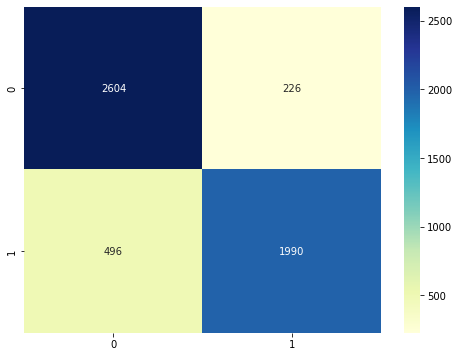

In [445]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predict)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,cmap="YlGnBu", fmt="d")

## 14. Cross-Validation 

In [446]:
#Cross-Validation on Train data
from sklearn.model_selection import cross_val_score

sc_train = cross_val_score(sc,X_train,Y_train,cv=5)

print('Training Score : ',sc_train.mean())

Training Score :  0.8664947471753065


In [447]:
#Cross-Validation on Test data
from sklearn.model_selection import cross_val_score

sc_test = cross_val_score(sc,X_test,Y_test,cv=5)
print('Testing Score : ',sc_test.mean())

Testing Score :  0.8474410980414347


It is observed that Cross-Validation (CV) Score on both the Training and Testing data is almost equal, which implies that the model is generalizing well and is likely to have a good balance between bias and variance.

## 15. Conclusion 

In Summary</br>

● Dataset Overview:

    1. We possess a dataset consisting of 17,720 rows and 232 variables.

    2. The target variable bears values of -1 and 1, signifying non-commercial and commercial programs respectively.

● Data Quality Check:

    3. No null values or duplicate rows have been identified.

    4. Two features, namely 'qid' and '88', contain only zeros and exhibit no correlation with the target. Consequently, they were removed.

● Outliers and Correlation Analysis:

    5. A substantial number of variables display outlier presence.

    6. Notably, features do not exhibit strong correlations with the target variable.

    7. This leads us to opt for non-parametric algorithms, with 'RBF' (Radial Basis Function) kernel being chosen for SVM due to its adaptability to complex relationships.

● Data Encoding and Scaling:

    8. Absence of categorical data negates the need for encoding.

    9. Standard scaling has been implemented for feature scaling.

● Data Splitting:

    10. The dataset has been partitioned into a training set (70%) and a testing set (30%).

● Model Building and Parameters:

    11. An SVM model was constructed, utilizing the 'RBF' kernel, along with parameters:
        'C': 1.0,
        'degree': 3,
        'gamma': 'scale',
        'kernel': 'rbf'.

● Model Evaluation:

    12. The model exhibited an accuracy of 86% upon evaluation.

● Cross Validation:

    13. Cross-validation was conducted, revealing comparable CV scores for both training and testing data. This suggests effective generalization and a balanced bias-variance trade-off.